# Social Media Sentiments Analysis

# Importing Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
df = pd.read_csv("/home/shyam/Desktop/K VIJAY INTERNSHIP/Social Media Sentiment Analysis/dataset/sentimentdataset.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


# Preprocessing: Inspect and Clean Data

In [5]:
print('Columns of dataset: ', df.columns, '\n')
print('Dimension of dataset: ', df.shape, '\n')
print('Infomation of dataset: ', df.info())

Columns of dataset:  Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object') 

Dimension of dataset:  (732, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null

In [6]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Preprocessing: Wrangle and Transform data

In [8]:
# Drop unrelevant and unclear no-name columns from the dataset
df1=df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [9]:
# check statistical distribution of numerical variables
df1.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [10]:
# check statistical distribution of numerical variables
df1.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [11]:
# Check object columns: count of all values in the column, unique value, top value, frequency of value
df1.describe(include=['object'])

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country
count,732,732,732,732,732,732,732
unique,707,279,683,685,4,697,115
top,"A compassionate rain, tears of empathy fallin...",Positive,2022-07-17 06:15:00,WindWhisperer,Instagram,#Compassionate #TearsOfEmpathy,USA
freq,3,44,3,3,258,3,59


In [12]:
# Series.str.strip() in pandas: Remove leading and trailing characters in Series/Index.
df1['Text']= df1['Text'].str.strip()
df1['Sentiment']= df1['Sentiment'].str.strip()
df1['User']= df1['User'].str.strip()
df1['Platform']= df1['Platform'].str.strip()
df1['Hashtags']= df1['Hashtags'].str.strip()
df1['Country']= df1['Country'].str.strip()

In [13]:
# to see unique values in 'Platform' column
print("Print unique values in 'Platform'column: ", df1['Platform'].unique(), '\n')
print("Value counts in 'Platform' column: ", '\n', df1['Platform'].value_counts())

Print unique values in 'Platform'column:  ['Twitter' 'Instagram' 'Facebook'] 

Value counts in 'Platform' column:  
 Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64


In [14]:
df1.sample(3)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
230,"A journey into the past, flipping through the ...",Nostalgia,2018-08-10 15:45:00,DiaryExplorer,Facebook,#Nostalgia #DiaryJourney,12.0,25.0,Canada,2018,8,10,15
665,Planning a surprise scavenger hunt for friends...,Excitement,2023-08-24 18:20:00,ScavengerHuntMasterHighSchool,Instagram,#SurpriseAdventure #HighSchoolFun,20.0,38.0,UK,2023,8,24,18
227,"Navigating through the labyrinth of thoughts, ...",Confusion,2021-05-02 11:45:00,MazeNavigator,Facebook,#Confusion #ThoughtLabyrinth,14.0,28.0,Australia,2021,5,2,11


In [15]:
#Let's look at the number of unique sentiments
df['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

There are 279 unique sentiments ,so we have to scale it down into a smaller number . I prefer mapping each sentiment to positive,negative and neutral

In [17]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(sentiment):
    score = analyzer.polarity_scores(sentiment)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
sentiments=df['Sentiment'].tolist()
sentiments=[get_vader_sentiment(sentiment) for sentiment in sentiments]
df['Category']=pd.Series(sentiments)
df['Category'].value_counts()    


Defaulting to user installation because normal site-packages is not writeable


Category
Positive    378
Negative    183
Neutral     171
Name: count, dtype: int64

Text(0.5, 1.0, 'Kinds of Sentiment in descending order')

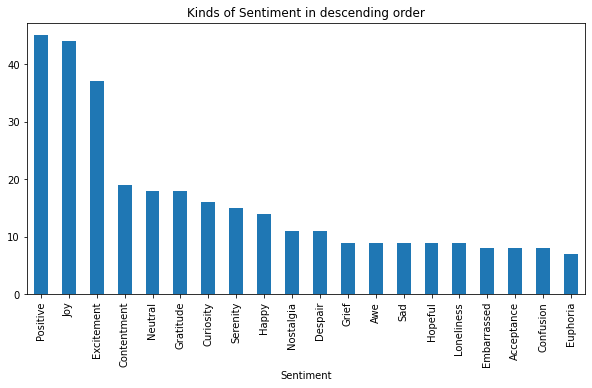

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
df1['Sentiment'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Kinds of Sentiment in descending order")

Text(0.5, 1.0, 'Proportion of Platform')

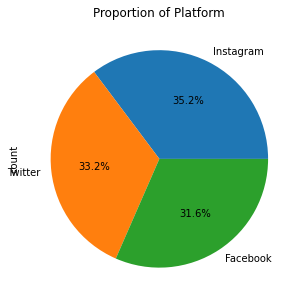

In [23]:
plt.figure(figsize=(10, 5))
df1['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportion of Platform")